In [1]:
!pip install pandas numpy seaborn matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas test: 6
NumPy test: 6
Matplotlib test: [<matplotlib.lines.Line2D object at 0x00000253898F5FD0>]
Seaborn test:    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2


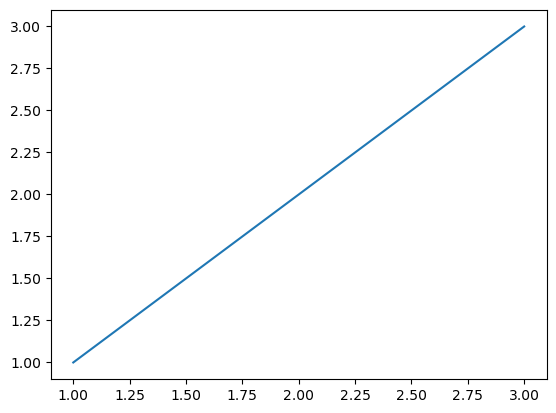

In [7]:
# Test Pandas
print("Pandas test:", pd.Series([1, 2, 3]).sum())

# Test NumPy
print("NumPy test:", np.array([1, 2, 3]).sum())

# Test Matplotlib
print("Matplotlib test:", plt.plot([1, 2, 3], [1, 2, 3]))

# Test Seaborn
print("Seaborn test:", sns.load_dataset("tips").head(1))

In [9]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


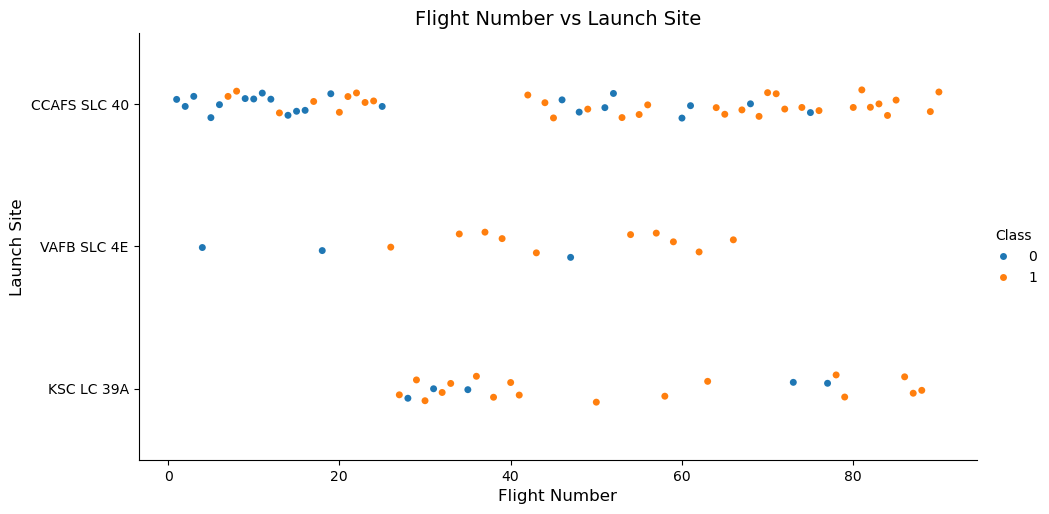

In [11]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Flight Number vs Launch Site", fontsize=14)
plt.show()

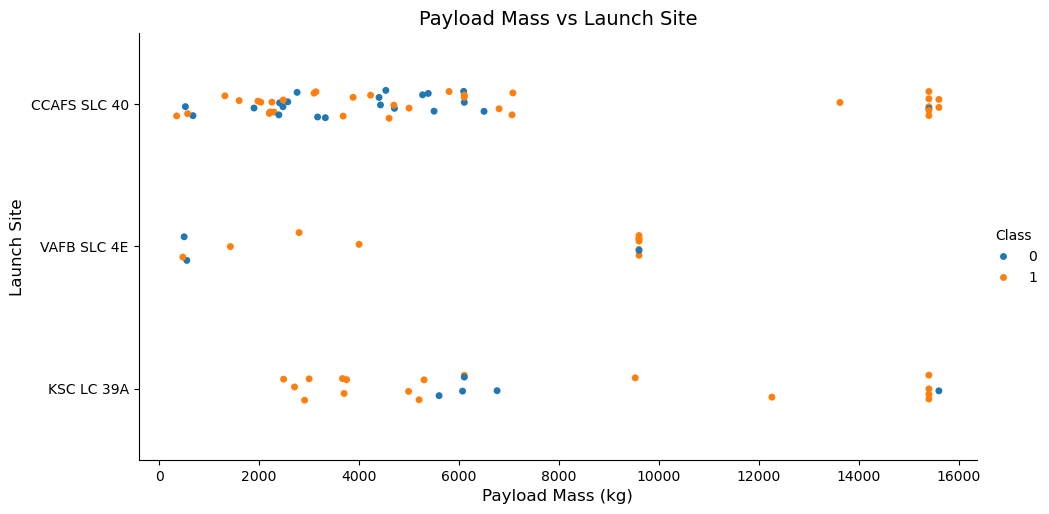

In [13]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Payload Mass vs Launch Site", fontsize=14)
plt.show()

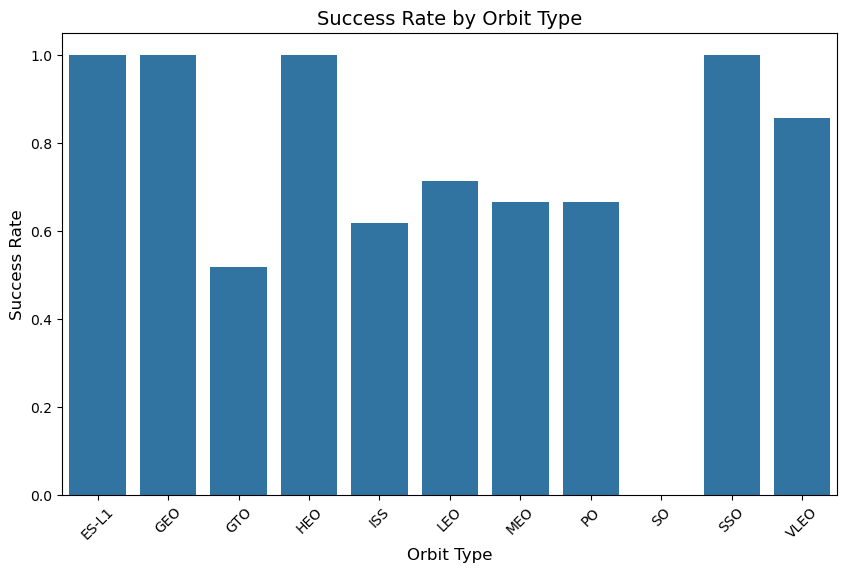

In [15]:
# Calculate success rate by orbit
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=orbit_success)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Success Rate by Orbit Type', fontsize=14)
plt.xticks(rotation=45)
plt.show()

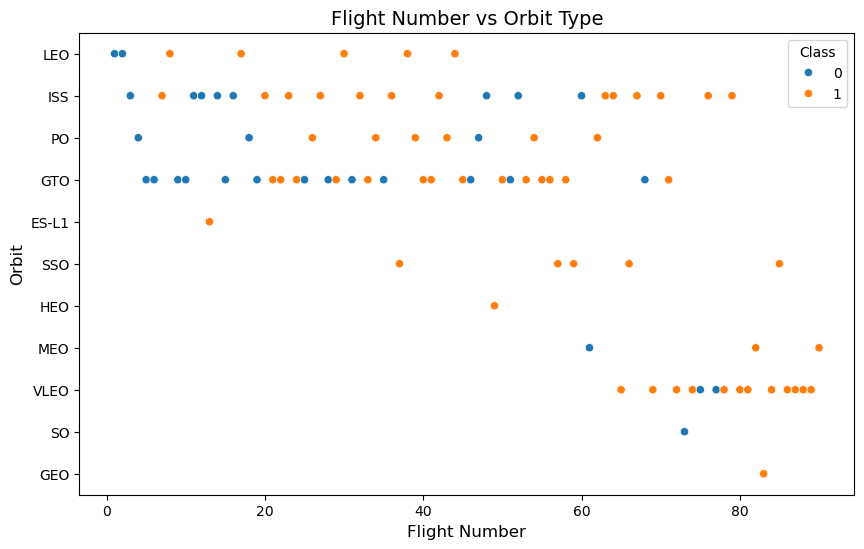

In [17]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10,6))
sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Orbit", fontsize=12)
plt.title("Flight Number vs Orbit Type", fontsize=14)
plt.show()

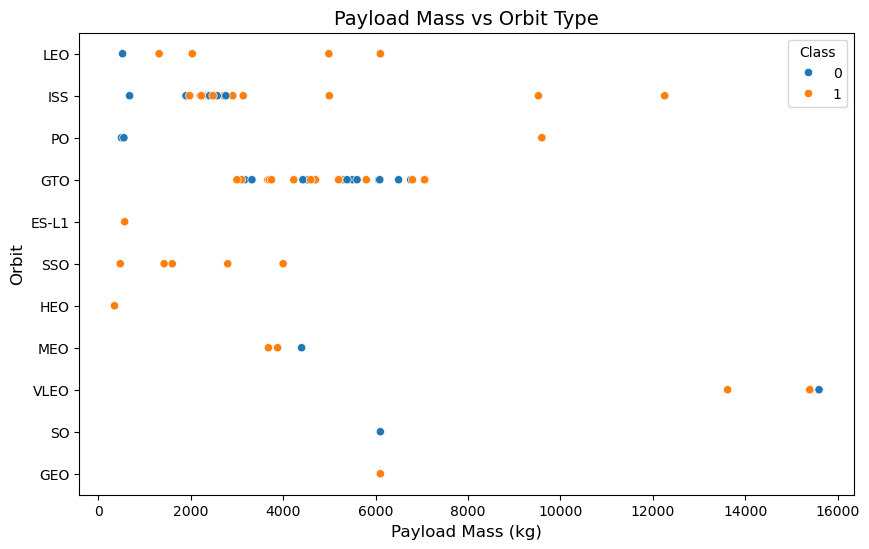

In [19]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10,6))
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Orbit", fontsize=12)
plt.title("Payload Mass vs Orbit Type", fontsize=14)
plt.show()

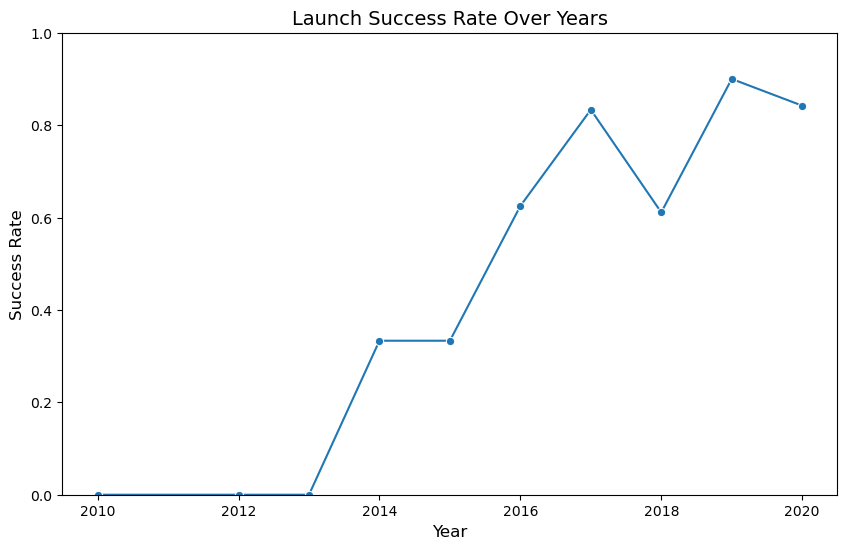

In [21]:
# Extract year from date
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate success rate by year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Launch Success Rate Over Years', fontsize=14)
plt.ylim(0, 1)
plt.show()

In [23]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [25]:
# Convert categorical columns to dummy variables
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Convert all columns to float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [29]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)